In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('customers.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
value_counts = df['y'].value_counts()
value_counts

y
no     39922
yes     5289
Name: count, dtype: int64

In [4]:
from imblearn.over_sampling import RandomOverSampler

input_columns = df.drop('y', axis=1)  

class_column = df['y']

oversampler = RandomOverSampler(random_state=0)

input_columns_resampled, class_column_resampled = oversampler.fit_resample(input_columns, class_column)

df = pd.concat([input_columns_resampled, class_column_resampled], axis=1)

In [5]:
class_distribution = df['y'].value_counts()
class_distribution

y
no     39922
yes    39922
Name: count, dtype: int64

In [6]:
X = df.iloc[:,0:16].values

y = df.iloc[:,-1]

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

In [8]:
print(y)

[0 0 0 ... 1 1 1]


In [9]:
X_job = X[:,[1]]
print(np.unique(X_job))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       sparse_threshold=0)

X_job = ct.fit_transform(X_job)

print(X_job.shape)

(79844, 12)


In [11]:
print(X_job)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [12]:
X_cat = X[:,[1, 2, 3, 4, 6, 7, 8, 10, 15]]

In [13]:
X_cat.shape

(79844, 9)

In [14]:
orginalNumOfCols = X_cat.shape[1]

for i in range(X_cat.shape[1]): 
    
    currNumOfCols = X_cat.shape[1]
    
    indexOfColumnToEncode = currNumOfCols - orginalNumOfCols + i
    
    ct = ColumnTransformer(transformers=
                            [('encoder', 
                              OneHotEncoder(), [indexOfColumnToEncode])], 
                           remainder='passthrough', 
                           sparse_threshold=0)
    
    X_cat = ct.fit_transform(X_cat)

In [15]:
X_cat.shape

(79844, 44)

In [16]:
X_num = X[:,[0, 5, 9, 11, 12, 13, 14]]

X = np.concatenate((X_num,X_cat), axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3408 - accuracy: 0.8563 - val_loss: 0.3088 - val_accuracy: 0.8722
Epoch 2/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2888 - accuracy: 0.8829 - val_loss: 0.2909 - val_accuracy: 0.8807
Epoch 3/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2658 - accuracy: 0.8937 - val_loss: 0.2770 - val_accuracy: 0.8901
Epoch 4/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.9024 - val_loss: 0.2673 - val_accuracy: 0.8979
Epoch 5/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9096 - val_loss: 0.2615 - val_accuracy: 0.8952
Epoch 6/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2177 - accuracy: 0.9171 - val_loss: 0.2507 - val_accuracy: 0.9072
Epoch 7/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2049 - accuracy: 0.9216 - val_loss: 0.2581 - val_ac

1872/1872 [==============================] - 3s 2ms/step - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.3115 - val_accuracy: 0.9502
Epoch 58/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9858 - val_loss: 0.3473 - val_accuracy: 0.9463
Epoch 59/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.3518 - val_accuracy: 0.9480
Epoch 60/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0426 - accuracy: 0.9860 - val_loss: 0.3584 - val_accuracy: 0.9458
Epoch 61/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0368 - accuracy: 0.9874 - val_loss: 0.4139 - val_accuracy: 0.9410
Epoch 62/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9860 - val_loss: 0.3802 - val_accuracy: 0.9436
Epoch 63/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9867 - val_loss: 0.3722 - val_accuracy

In [20]:
from keras.layers import Dropout

classifier = Sequential()

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(units = 32, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifierHistory = classifier.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test)) 

Epoch 1/100
1872/1872 [==============================] - 4s 2ms/step - loss: 0.3694 - accuracy: 0.8445 - val_loss: 0.3223 - val_accuracy: 0.8638
Epoch 2/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.3149 - accuracy: 0.8720 - val_loss: 0.3070 - val_accuracy: 0.8748
Epoch 3/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.8800 - val_loss: 0.2999 - val_accuracy: 0.8771
Epoch 4/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2880 - accuracy: 0.8839 - val_loss: 0.2925 - val_accuracy: 0.8808
Epoch 5/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.8883 - val_loss: 0.2866 - val_accuracy: 0.8875
Epoch 6/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.8921 - val_loss: 0.2773 - val_accuracy: 0.8926
Epoch 7/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.8958 - val_loss: 0.2737 - val_ac

1872/1872 [==============================] - 3s 2ms/step - loss: 0.1645 - accuracy: 0.9405 - val_loss: 0.1969 - val_accuracy: 0.9321
Epoch 58/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1635 - accuracy: 0.9410 - val_loss: 0.2010 - val_accuracy: 0.9307
Epoch 59/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9408 - val_loss: 0.2004 - val_accuracy: 0.9306
Epoch 60/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1632 - accuracy: 0.9408 - val_loss: 0.2019 - val_accuracy: 0.9311
Epoch 61/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1630 - accuracy: 0.9407 - val_loss: 0.1977 - val_accuracy: 0.9320
Epoch 62/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1603 - accuracy: 0.9418 - val_loss: 0.1994 - val_accuracy: 0.9317
Epoch 63/100
1872/1872 [==============================] - 3s 2ms/step - loss: 0.1605 - accuracy: 0.9417 - val_loss: 0.1974 - val_accuracy

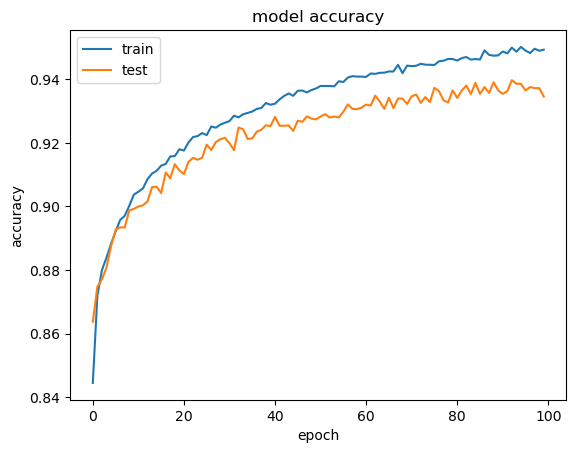

In [21]:
import matplotlib.pyplot as plt

plt.plot(classifierHistory.history['accuracy'])
plt.plot(classifierHistory.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
evaluation = classifier.evaluate(X_test, y_test)

print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

624/624 [==============================] - 1s 909us/step - loss: 0.2001 - accuracy: 0.9346
Loss: 0.20007461309432983
Accuracy: 0.9345723986625671


In [23]:
y_pred = classifier.predict(X_test)

y_pred_binary = (y_pred > 0.5)

print(y_pred_binary)

624/624 [==============================] - 1s 839us/step
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", round(100*accuracy,2))


precision = precision_score(y_test, y_pred_binary)
print("Precision:", round(100*precision,2))

recall = recall_score(y_test, y_pred_binary)
print("Recall:", round(100*recall,2))

f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", round(100*f1,2))

Accuracy: 93.46
Precision: 89.4
Recall: 98.75
F1 Score: 93.84
